Nama : Nadia Ramadhani, Faiqotul Mahmudah

Table of Contents

1. Introduction
2. Exploratory Data Analysis
3. Feature Analysis
    - Correlations
    - Categorical Features
    - Numerical Features
    - Bivariate Analysis
4. Classification
    - Classification using sklearn's random forest classifier


INTRODUCTION

Dataset ini merupakan data Anggaran Pendapatan dan Belanja Daerah (APBD) yang berisikan rencana keuangan pemerintah daerah selama satu tahun yang ditetapkan oleh peraturan daerah. 

Data ini diambil dari data rencana keuangan Provinsi Aceh. Dimana didalamnya mengandung beberapa kolom yaitu :
kode pemda, nama pemda, sumber, tahun, bulan, kode data, jenis coa, nomor perda, tanggal perda, nama aplikasi, pengembang aplikasi, kode fungsi, nama fungsi, kode sub fungsi, nama sub fungsi, kode urusan program, nama urusan program, kode urusan pelaksana, nama urusan pelaksana, kode skpd, nama skpd, kode unit skpd, nama unit skpd, kode program, nama program, nama outcome, target outcome, satuan outcome, kode kegiatan, nama kegiatan, kode sub kegiatan, nama sub kegiatan, nama output, target output, satuan output, kode lokasi, nama lokasi, kode akun utama, nama akun utama, kode akun kelompok, nama akun kelompok, kode akun jenis, nama akun jenis, kode akun objek, nama akun objek, kode akun rinci, nama akun rinci, kode akun subrinci, nama akun subrinci, kode akun subsubrinci, nama akun subsubrinci, kode akun subsubsubrinci, nama akun subsubsubrinci, volume, satuan, harga satuan, kode sumber dana, nama sumber dana, nilai anggaran, catatan.

In [1]:
#Import Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
import sklearn.metrics

from patsy import dmatrices
from sklearn import ensemble
from sklearn import linear_model

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import plot_confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

EXPLORATORY DATA ANALYSIS

In [2]:
data = pd.read_csv("A2022_dataset_buat bedah data.csv", chunksize = 1000,  on_bad_lines = 'skip', delimiter = ';')
chunk_number = 1
chunks = []

for i, chunk in enumerate(data):
    data = pd.DataFrame(chunk)
    chunks.append(data)
    if i == chunk_number:
        break

In [3]:
data = pd.concat(chunks)
data.head()

,kodepemda,namapemda,sumber,tahun,bulan,kodedata,jeniscoa,nomorperda,tanggalperda,namaaplikasi,...,namaakunsubsubrinci,kodeakunsubsubsubrinci,namaakunsubsubsubrinci,volume,satuan,hargasatuan,kodesumberdana,namasumberdana,nilaianggaran,catatan
0,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,NaN,...,NaN,NaN,NaN,0,NaN,0,NaN,NaN,31600000,NaN
1,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,NaN,...,NaN,NaN,NaN,0,NaN,0,NaN,NaN,50000000,NaN
2,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,NaN,...,NaN,NaN,NaN,0,NaN,0,NaN,NaN,57250000,NaN
3,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,NaN,...,NaN,NaN,NaN,0,NaN,0,NaN,NaN,50000000,NaN
4,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,NaN,...,NaN,NaN,NaN,0,NaN,0,NaN,NaN,600669000,NaN


In [4]:
data.tail()

,kodepemda,namapemda,sumber,tahun,bulan,kodedata,jeniscoa,nomorperda,tanggalperda,namaaplikasi,...,namaakunsubsubrinci,kodeakunsubsubsubrinci,namaakunsubsubsubrinci,volume,satuan,hargasatuan,kodesumberdana,namasumberdana,nilaianggaran,catatan
1995,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,NaN,...,NaN,NaN,NaN,0,NaN,0,NaN,NaN,1087300000,NaN
1996,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,NaN,...,NaN,NaN,NaN,0,NaN,0,NaN,NaN,53160000,NaN
1997,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,NaN,...,NaN,NaN,NaN,0,NaN,0,NaN,NaN,642125000,NaN
1998,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,NaN,...,NaN,NaN,NaN,0,NaN,0,NaN,NaN,18891200,NaN
1999,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,NaN,...,NaN,NaN,NaN,0,NaN,0,NaN,NaN,2694027217,NaN


In [5]:
#Menampilkan nama-nama kolom.

print("Shape : {s}".format(s = data.shape))
print("Column headers/names: {s}".format(s = list(data)))

Shape : (2000, 60)
Column headers/names: ['kodepemda', 'namapemda', 'sumber', 'tahun', 'bulan', 'kodedata', 'jeniscoa', 'nomorperda', 'tanggalperda', 'namaaplikasi', 'pengembangaplikasi', 'kodefungsi', 'namafungsi', 'kodesubfungsi', 'namasubfungsi', 'kodeurusanprogram', 'namaurusanprogram', 'kodeurusanpelaksana', 'namaurusanpelaksana', 'kodeskpd', 'namaskpd', 'kodeunitskpd', 'namaunitskpd', 'kodeprogram', 'namaprogram', 'namaoutcome', 'targetoutcome', 'satuanoutcome', 'kodekegiatan', 'namakegiatan', 'kodesubkegiatan', 'namasubkegiatan', 'namaoutput', 'targetoutput', 'satuanoutput', 'kodelokasi', 'namalokasi', 'kodeakunutama', 'namaakunutama', 'kodeakunkelompok', 'namaakunkelompok', 'kodeakunjenis', 'namaakunjenis', 'kodeakunobjek', 'namaakunobjek', 'kodeakunrinci', 'namaakunrinci', 'kodeakunsubrinci', 'namaakunsubrinci', 'kodeakunsubsubrinci', 'namaakunsubsubrinci', 'kodeakunsubsubsubrinci', 'namaakunsubsubsubrinci', 'volume', 'satuan', 'hargasatuan', 'kodesumberdana', 'namasumberdana'

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   kodepemda               2000 non-null   float64
 1   namapemda               2000 non-null   object 
 2   sumber                  2000 non-null   object 
 3   tahun                   2000 non-null   int64  
 4   bulan                   2000 non-null   int64  
 5   kodedata                2000 non-null   int64  
 6   jeniscoa                2000 non-null   int64  
 7   nomorperda              2000 non-null   object 
 8   tanggalperda            2000 non-null   object 
 9   namaaplikasi            0 non-null      float64
 10  pengembangaplikasi      0 non-null      float64
 11  kodefungsi              2000 non-null   int64  
 12  namafungsi              2000 non-null   object 
 13  kodesubfungsi           2000 non-null   int64  
 14  namasubfungsi           0 non-null      

In [7]:
data.describe()

,kodepemda,tahun,bulan,kodedata,jeniscoa,namaaplikasi,pengembangaplikasi,kodefungsi,kodesubfungsi,namasubfungsi,...,namaakunsubsubrinci,kodeakunsubsubsubrinci,namaakunsubsubsubrinci,volume,satuan,hargasatuan,kodesumberdana,namasumberdana,nilaianggaran,catatan
count,2000.0,2000.0,2000.0,2000.0,2000.0,0.0,0.0,2000.000000,2000.0,0.0,...,0.0,0.0,0.0,2000.0,0.0,2000.0,0.0,0.0,2.000000e+03,0.0
mean,1.0,2022.0,0.0,1.0,3.0,NaN,NaN,8.775500,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,3.251770e+09,NaN
std,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.960873,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,2.406511e+10,NaN
min,1.0,2022.0,0.0,1.0,3.0,NaN,NaN,1.000000,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1.347000e+03,NaN
25%,1.0,2022.0,0.0,1.0,3.0,NaN,NaN,7.000000,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1.186000e+07,NaN
50%,1.0,2022.0,0.0,1.0,3.0,NaN,NaN,10.000000,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,4.999436e+07,NaN
75%,1.0,2022.0,0.0,1.0,3.0,NaN,NaN,10.000000,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,2.826705e+08,NaN
max,1.0,2022.0,0.0,1.0,3.0,NaN,NaN,11.000000,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,4.763700e+11,NaN


In [8]:
#Mengecek missing value.

data.isnull().sum()

kodepemda                    0
namapemda                    0
sumber                       0
tahun                        0
bulan                        0
kodedata                     0
jeniscoa                     0
nomorperda                   0
tanggalperda                 0
namaaplikasi              2000
pengembangaplikasi        2000
kodefungsi                   0
namafungsi                   0
kodesubfungsi                0
namasubfungsi             2000
kodeurusanprogram            0
namaurusanprogram            0
kodeurusanpelaksana          0
namaurusanpelaksana          0
kodeskpd                     0
namaskpd                     0
kodeunitskpd                 0
namaunitskpd                 0
kodeprogram                  0
namaprogram                  0
namaoutcome               2000
targetoutcome                0
satuanoutcome             2000
kodekegiatan                 0
namakegiatan                 0
kodesubkegiatan              0
namasubkegiatan              0
namaoutp

In [9]:
#Drop kolom yang memiliki missing value

data2 = data.drop(['namaaplikasi', 'pengembangaplikasi', 'namasubfungsi',  'namaoutcome', 'satuanoutcome', 'namaoutput', 'satuanoutput', 'kodelokasi', 'namalokasi', 'kodeakunsubsubrinci', 'namaakunsubsubrinci', 'kodeakunsubsubsubrinci', 'namaakunsubsubsubrinci', 'satuan', 'kodesumberdana' , 'namasumberdana', 'catatan'], axis = 1)
data2

,kodepemda,namapemda,sumber,tahun,bulan,kodedata,jeniscoa,nomorperda,tanggalperda,kodefungsi,...,namaakunjenis,kodeakunobjek,namaakunobjek,kodeakunrinci,namaakunrinci,kodeakunsubrinci,namaakunsubrinci,volume,hargasatuan,nilaianggaran
0,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,10,...,Retribusi Daerah ...,2,Retribusi Jasa Usaha ...,1,Retribusi Pemakaian Kekayaan Daerah ...,5,Retribusi Pemakaian Ruangan ...,0,0,31600000
1,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,10,...,Retribusi Daerah ...,2,Retribusi Jasa Usaha ...,1,Retribusi Pemakaian Kekayaan Daerah ...,1,Retribusi Penyewaan Tanah dan Bangunan ...,0,0,50000000
2,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,10,...,Retribusi Daerah ...,2,Retribusi Jasa Usaha ...,6,Retribusi Tempat Penginapan/ Pesanggrahan/Vila...,1,Retribusi Pelayanan Tempat Penginapan/ Pesangg...,0,0,57250000
3,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,10,...,Lain-lain PAD yang Sah ...,11,Pendapatan Denda atas Keterlambatan Pelaksanaa...,1,Pendapatan Denda atas Keterlambatan Pelaksanaa...,1,Pendapatan Denda atas Keterlambatan Pelaksanaa...,0,0,50000000
4,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,10,...,Lain-lain PAD yang Sah ...,15,Pendapatan dari Pengembalian ...,1,Pendapatan dari Pengembalian Kelebihan Pembaya...,1,Pendapatan dari Pengembalian Kelebihan Pembaya...,0,0,600669000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,7,...,Belanja Modal Peralatan dan Mesin ...,8,Belanja Modal Alat Laboratorium ...,4,Belanja Modal Alat Laboratorium Fisika Nuklir/...,5,Belanja Modal System/Power Supply ...,0,0,1087300000
1996,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,7,...,Belanja Modal Peralatan dan Mesin ...,8,Belanja Modal Alat Laboratorium ...,5,Belanja Modal Alat Proteksi Radiasi/Proteksi L...,2,Alat Kesehatan Kerja ...,0,0,53160000
1997,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,7,...,Belanja Modal Peralatan dan Mesin ...,8,Belanja Modal Alat Laboratorium ...,9,Belanja Modal Alat Laboratorium Standarisasi K...,11,Belanja Modal Alat Laboratorium Standarisasi K...,0,0,642125000
1998,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,7,...,Belanja Modal Peralatan dan Mesin ...,8,Belanja Modal Alat Laboratorium ...,1,Belanja Modal Unit Alat Laboratorium ...,11,Belanja Modal Alat Laboratorium Umum ...,0,0,18891200


In [10]:
#Mencari data unik

print(data2['namapemda'].unique())
print(data2['sumber'].unique())
print(data2['tahun'].unique())
print(data2['bulan'].unique())
print(data2['kodedata'].unique())
print(data2['jeniscoa'].unique())
print(data2['tanggalperda'].unique())
print(data2['kodefungsi'].unique())
print(data2['namafungsi'].unique())
print(data2['kodesubfungsi'].unique())
print(data2['kodeurusanprogram'].unique())
print(data2['namaurusanprogram'].unique())
print(data2['kodeurusanpelaksana'].unique())
print(data2['namaurusanpelaksana'].unique())
print(data2['kodeskpd'].unique())
print(data2['namaskpd'].unique())
print(data2['kodeunitskpd'].unique())
print(data2['namaunitskpd'].unique())
print(data2['kodeprogram'].unique())
print(data2['targetoutcome'].unique())
print(data2['kodekegiatan'].unique())
print(data2['namakegiatan'].unique())
print(data2['kodesubkegiatan'].unique())
print(data2['namasubkegiatan'].unique())
#...
print(data2['nilaianggaran'].unique())

['Provinsi Aceh']
['Sinergi5']
[2022]
[0]
[1]
[3]
['1900-01-01']
[10  7  6  3 11  4  5  8  1]
['Pendidikan' 'Kesehatan' 'Perumahan dan fasilitas umum'
 'Ketertiban dan ketentraman' 'Perlindungan Sosial' 'Ekonomi '
 'Lingkungan Hidup' 'Pariwisata dan Budaya' 'Pelayanan Umum ']
[0]
['1.01.' '1.02.' '1.03.' '1.04.' '1.05.' '1.06.' '2.07.' '2.09.' '2.10.'
 '2.11.' '2.13.' '2.15.' '2.17.' '2.19.' '2.22.' '2.23.' '3.25.' '3.27.'
 '3.29.' '3.30.' '4.01.' '4.02.' '5.01.' '5.02.' '5.03.' '5.04.' '5.07.'
 '8.01.' '9.01.']
['URUSAN PEMERINTAHAN BIDANG PENDIDIKAN'
 'URUSAN PEMERINTAHAN BIDANG KESEHATAN'
 'URUSAN PEMERINTAHAN BIDANG PEKERJAAN UMUM DAN PENATAAN RUANG'
 'URUSAN PEMERINTAHAN BIDANG PERUMAHAN DAN KAWASAN PERMUKIMAN'
 'KETENTERAMAN, KETERTIBAN UMUM DAN PERLINDUNGAN MASYARAKAT'
 'URUSAN PEMERINTAHAN BIDANG SOSIAL'
 'URUSAN PEMERINTAHAN BIDANG TENAGA KERJA'
 'URUSAN PEMERINTAHAN BIDANG PANGAN'
 'URUSAN PEMERINTAHAN BIDANG PERTANAHAN'
 'URUSAN PEMERINTAHAN BIDANG LINGKUNGAN HIDUP'
 'URUSAN

In [11]:
data2.nilaianggaran.value_counts().sort_index()

1347            1
14592           1
17432           1
24000           1
28263           1
               ..
297652670000    1
357289621288    1
391508000000    1
399706009000    1
476370000000    1
Name: nilaianggaran, Length: 1539, dtype: int64

In [12]:
#Mengecek kembali.

data2.isnull().sum()

kodepemda              0
namapemda              0
sumber                 0
tahun                  0
bulan                  0
kodedata               0
jeniscoa               0
nomorperda             0
tanggalperda           0
kodefungsi             0
namafungsi             0
kodesubfungsi          0
kodeurusanprogram      0
namaurusanprogram      0
kodeurusanpelaksana    0
namaurusanpelaksana    0
kodeskpd               0
namaskpd               0
kodeunitskpd           0
namaunitskpd           0
kodeprogram            0
namaprogram            0
targetoutcome          0
kodekegiatan           0
namakegiatan           0
kodesubkegiatan        0
namasubkegiatan        0
targetoutput           0
kodeakunutama          0
namaakunutama          0
kodeakunkelompok       0
namaakunkelompok       0
kodeakunjenis          0
namaakunjenis          0
kodeakunobjek          0
namaakunobjek          0
kodeakunrinci          0
namaakunrinci          0
kodeakunsubrinci       0
namaakunsubrinci       0


In [13]:
data2.head()

,kodepemda,namapemda,sumber,tahun,bulan,kodedata,jeniscoa,nomorperda,tanggalperda,kodefungsi,...,namaakunjenis,kodeakunobjek,namaakunobjek,kodeakunrinci,namaakunrinci,kodeakunsubrinci,namaakunsubrinci,volume,hargasatuan,nilaianggaran
0,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,10,...,Retribusi Daerah ...,2,Retribusi Jasa Usaha ...,1,Retribusi Pemakaian Kekayaan Daerah ...,5,Retribusi Pemakaian Ruangan ...,0,0,31600000
1,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,10,...,Retribusi Daerah ...,2,Retribusi Jasa Usaha ...,1,Retribusi Pemakaian Kekayaan Daerah ...,1,Retribusi Penyewaan Tanah dan Bangunan ...,0,0,50000000
2,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,10,...,Retribusi Daerah ...,2,Retribusi Jasa Usaha ...,6,Retribusi Tempat Penginapan/ Pesanggrahan/Vila...,1,Retribusi Pelayanan Tempat Penginapan/ Pesangg...,0,0,57250000
3,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,10,...,Lain-lain PAD yang Sah ...,11,Pendapatan Denda atas Keterlambatan Pelaksanaa...,1,Pendapatan Denda atas Keterlambatan Pelaksanaa...,1,Pendapatan Denda atas Keterlambatan Pelaksanaa...,0,0,50000000
4,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,10,...,Lain-lain PAD yang Sah ...,15,Pendapatan dari Pengembalian ...,1,Pendapatan dari Pengembalian Kelebihan Pembaya...,1,Pendapatan dari Pengembalian Kelebihan Pembaya...,0,0,600669000


In [14]:
data2.tail()

,kodepemda,namapemda,sumber,tahun,bulan,kodedata,jeniscoa,nomorperda,tanggalperda,kodefungsi,...,namaakunjenis,kodeakunobjek,namaakunobjek,kodeakunrinci,namaakunrinci,kodeakunsubrinci,namaakunsubrinci,volume,hargasatuan,nilaianggaran
1995,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,7,...,Belanja Modal Peralatan dan Mesin ...,8,Belanja Modal Alat Laboratorium ...,4,Belanja Modal Alat Laboratorium Fisika Nuklir/...,5,Belanja Modal System/Power Supply ...,0,0,1087300000
1996,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,7,...,Belanja Modal Peralatan dan Mesin ...,8,Belanja Modal Alat Laboratorium ...,5,Belanja Modal Alat Proteksi Radiasi/Proteksi L...,2,Alat Kesehatan Kerja ...,0,0,53160000
1997,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,7,...,Belanja Modal Peralatan dan Mesin ...,8,Belanja Modal Alat Laboratorium ...,9,Belanja Modal Alat Laboratorium Standarisasi K...,11,Belanja Modal Alat Laboratorium Standarisasi K...,0,0,642125000
1998,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,7,...,Belanja Modal Peralatan dan Mesin ...,8,Belanja Modal Alat Laboratorium ...,1,Belanja Modal Unit Alat Laboratorium ...,11,Belanja Modal Alat Laboratorium Umum ...,0,0,18891200
1999,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,7,...,Belanja Modal Peralatan dan Mesin ...,8,Belanja Modal Alat Laboratorium ...,1,Belanja Modal Unit Alat Laboratorium ...,11,Belanja Modal Alat Laboratorium Umum ...,0,0,2694027217


In [15]:
data2.set_index('kodefungsi',inplace=True)
data2.index = pd.to_datetime(data2.index)
data2.head()

,kodepemda,namapemda,sumber,tahun,bulan,kodedata,jeniscoa,nomorperda,tanggalperda,namafungsi,...,namaakunjenis,kodeakunobjek,namaakunobjek,kodeakunrinci,namaakunrinci,kodeakunsubrinci,namaakunsubrinci,volume,hargasatuan,nilaianggaran
kodefungsi,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000000010,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,Pendidikan,...,Retribusi Daerah ...,2,Retribusi Jasa Usaha ...,1,Retribusi Pemakaian Kekayaan Daerah ...,5,Retribusi Pemakaian Ruangan ...,0,0,31600000
1970-01-01 00:00:00.000000010,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,Pendidikan,...,Retribusi Daerah ...,2,Retribusi Jasa Usaha ...,1,Retribusi Pemakaian Kekayaan Daerah ...,1,Retribusi Penyewaan Tanah dan Bangunan ...,0,0,50000000
1970-01-01 00:00:00.000000010,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,Pendidikan,...,Retribusi Daerah ...,2,Retribusi Jasa Usaha ...,6,Retribusi Tempat Penginapan/ Pesanggrahan/Vila...,1,Retribusi Pelayanan Tempat Penginapan/ Pesangg...,0,0,57250000
1970-01-01 00:00:00.000000010,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,Pendidikan,...,Lain-lain PAD yang Sah ...,11,Pendapatan Denda atas Keterlambatan Pelaksanaa...,1,Pendapatan Denda atas Keterlambatan Pelaksanaa...,1,Pendapatan Denda atas Keterlambatan Pelaksanaa...,0,0,50000000
1970-01-01 00:00:00.000000010,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,Pendidikan,...,Lain-lain PAD yang Sah ...,15,Pendapatan dari Pengembalian ...,1,Pendapatan dari Pengembalian Kelebihan Pembaya...,1,Pendapatan dari Pengembalian Kelebihan Pembaya...,0,0,600669000


In [16]:
print("kodefungsi")
print(data2.iloc[0])

kodefungsi
kodepemda                                                            1.0
namapemda                                                  Provinsi Aceh
sumber                                                          Sinergi5
tahun                                                               2022
bulan                                                                  0
kodedata                                                               1
jeniscoa                                                               3
nomorperda                                                             -
tanggalperda                                                  1900-01-01
namafungsi                                                    Pendidikan
kodesubfungsi                                                          0
kodeurusanprogram                                                  1.01.
namaurusanprogram                  URUSAN PEMERINTAHAN BIDANG PENDIDIKAN
kodeurusanpelaksana                     

FEATURE ANALYSIS

Correlations

In [17]:
#Mencari korelasi antar data.

data2.corr

<bound method DataFrame.corr of                                kodepemda      namapemda    sumber  tahun  \
kodefungsi                                                                 
1970-01-01 00:00:00.000000010        1.0  Provinsi Aceh  Sinergi5   2022   
1970-01-01 00:00:00.000000010        1.0  Provinsi Aceh  Sinergi5   2022   
1970-01-01 00:00:00.000000010        1.0  Provinsi Aceh  Sinergi5   2022   
1970-01-01 00:00:00.000000010        1.0  Provinsi Aceh  Sinergi5   2022   
1970-01-01 00:00:00.000000010        1.0  Provinsi Aceh  Sinergi5   2022   
...                                  ...            ...       ...    ...   
1970-01-01 00:00:00.000000007        1.0  Provinsi Aceh  Sinergi5   2022   
1970-01-01 00:00:00.000000007        1.0  Provinsi Aceh  Sinergi5   2022   
1970-01-01 00:00:00.000000007        1.0  Provinsi Aceh  Sinergi5   2022   
1970-01-01 00:00:00.000000007        1.0  Provinsi Aceh  Sinergi5   2022   
1970-01-01 00:00:00.000000007        1.0  Provinsi Aceh 

<AxesSubplot:>

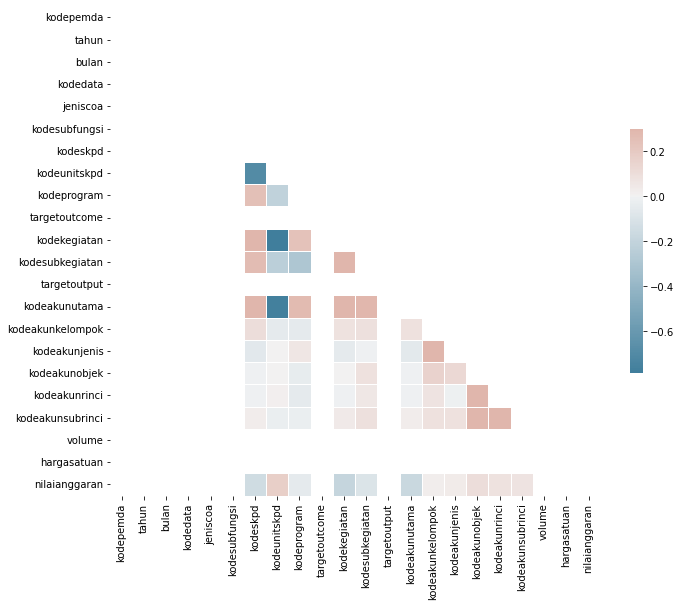

In [18]:
#Mencari korelasi menggunakan heatmap.
corr = data2.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
#Mengecek nilai pasti dari korelasi tersebut.

korelasi = data2['kodeakunutama'].corr(data2['kodekegiatan'])
korelasi

0.977059001695074

Categorical Features 

In [20]:
def plot_uni_cat(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,5))
    f.suptitle(d.name+' nilaianggaran',fontsize=15)
    sns.countplot(d,ax=ax[0])
    d.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
    plt.tight_layout()

2    782
1    761
7    170
0    120
3     58
8     56
5     29
4     24
Name: kodeprogram, dtype: int64


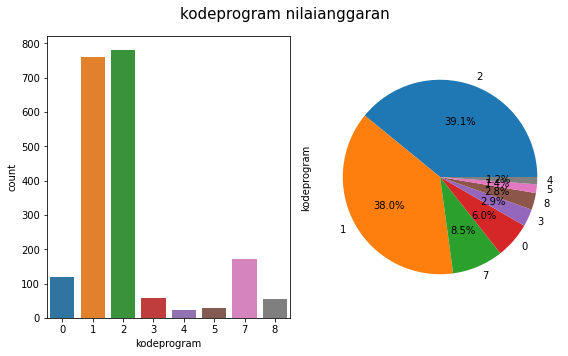

In [21]:
print(data2.kodeprogram.value_counts())
plot_uni_cat(data2['kodeprogram'])

Numerical Features

In [22]:
def plot_uni(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.histplot(d, kde=True, ax=ax[0])
    ax[0].axvline(d.mean(), color='y', linestyle='--',linewidth=2)
    ax[0].axvline(d.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(d.mode()[0],color='g',linestyle='solid',linewidth=2)
    ax[0].legend({'Mean':d.mean(),'Median':d.median(),'Mode':d.mode()})
    
    sns.boxplot(x=d, showmeans=True, ax=ax[1])
    plt.tight_layout()

In [23]:
num_cols = data2.select_dtypes('int64').columns.values
num_cols

array(['tahun', 'bulan', 'kodedata', 'jeniscoa', 'kodesubfungsi',
       'kodeskpd', 'kodeunitskpd', 'kodeprogram', 'targetoutcome',
       'kodekegiatan', 'kodesubkegiatan', 'targetoutput', 'kodeakunutama',
       'kodeakunkelompok', 'kodeakunjenis', 'kodeakunobjek',
       'kodeakunrinci', 'kodeakunsubrinci', 'volume', 'hargasatuan',
       'nilaianggaran'], dtype=object)

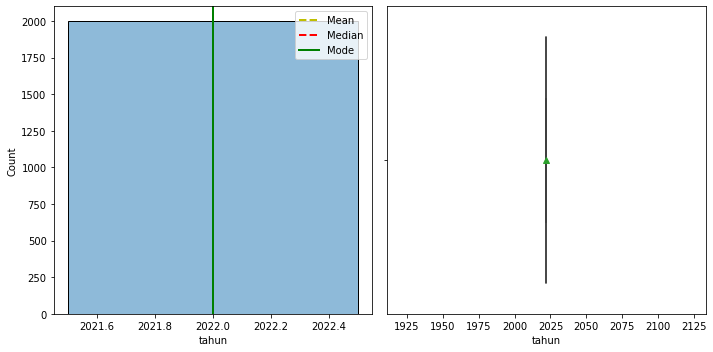

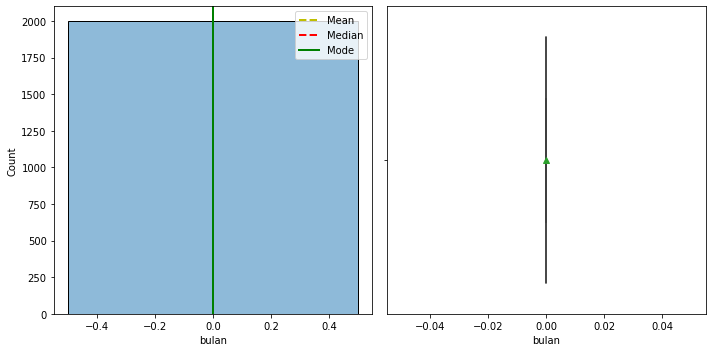

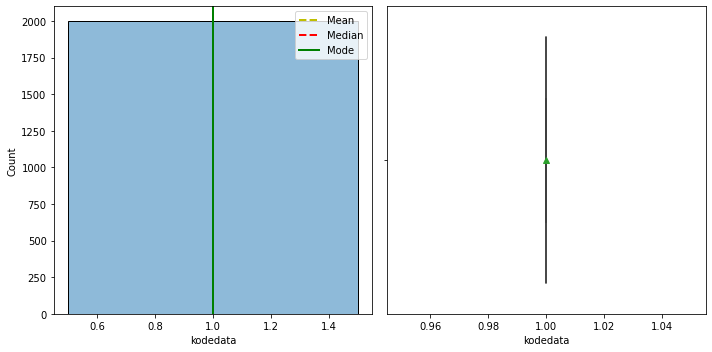

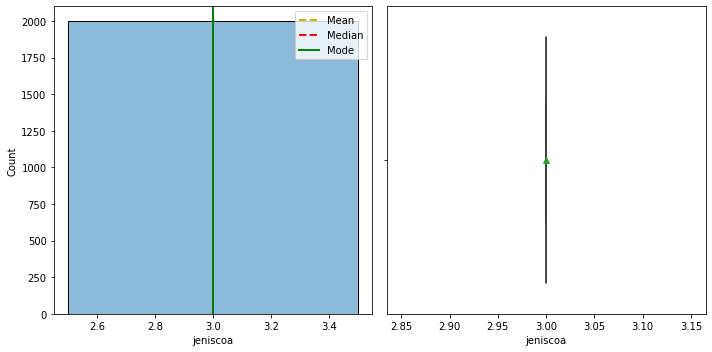

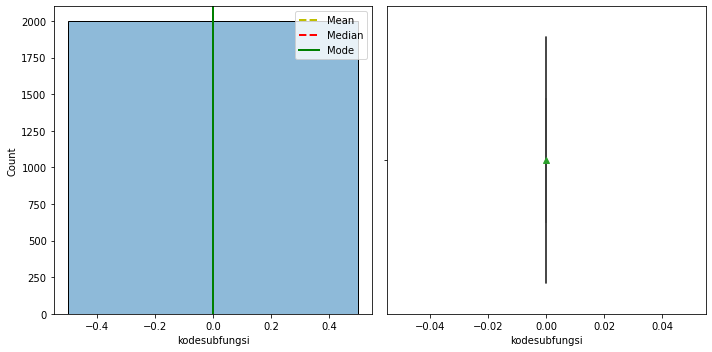

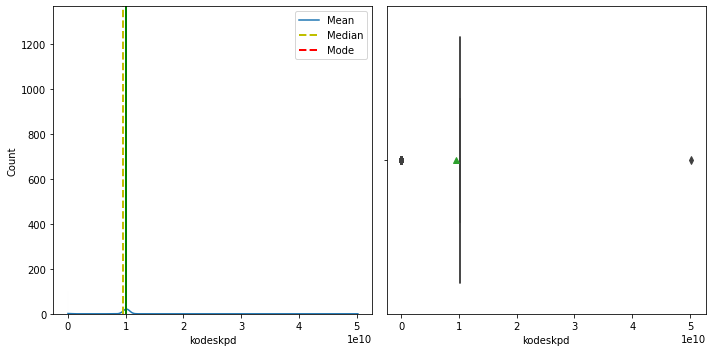

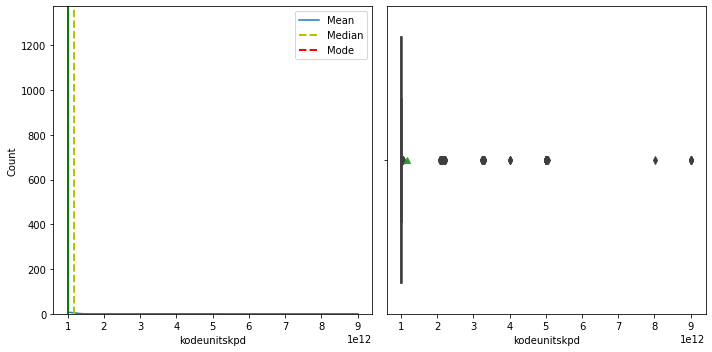

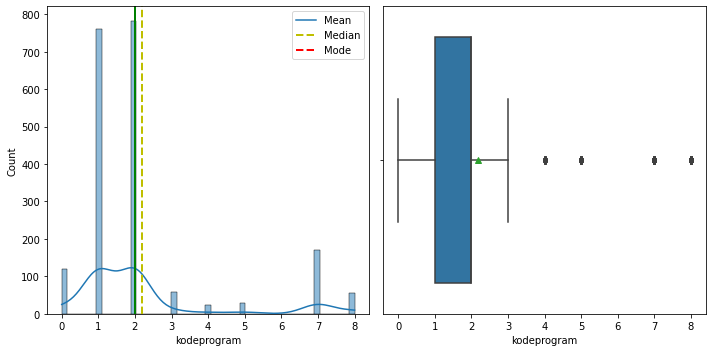

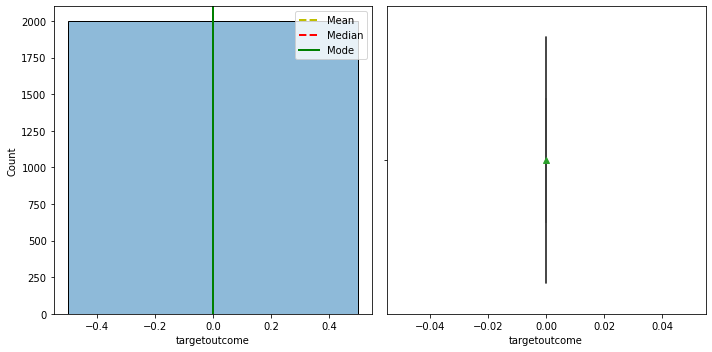

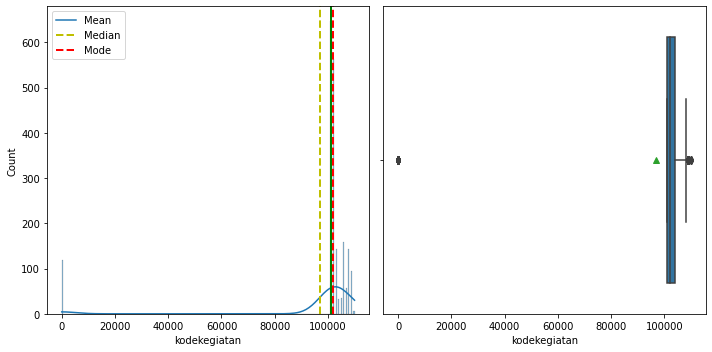

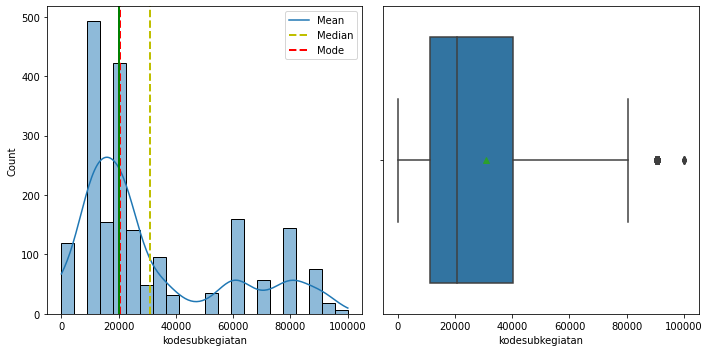

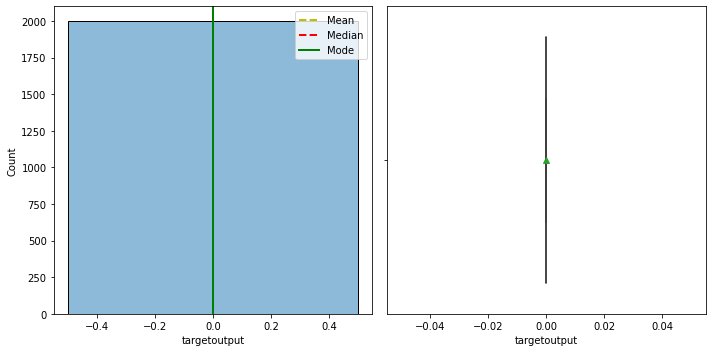

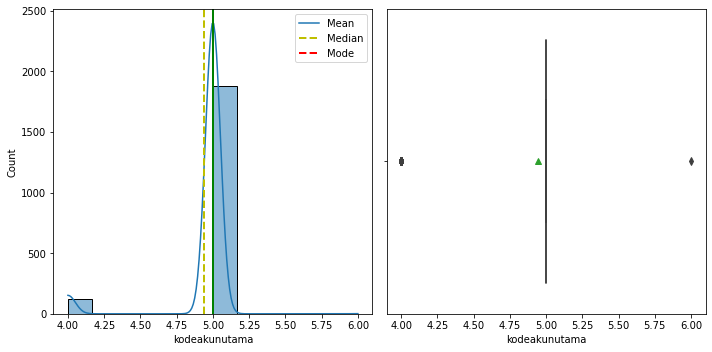

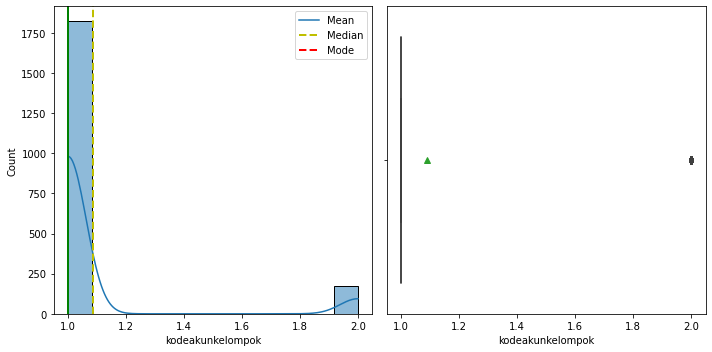

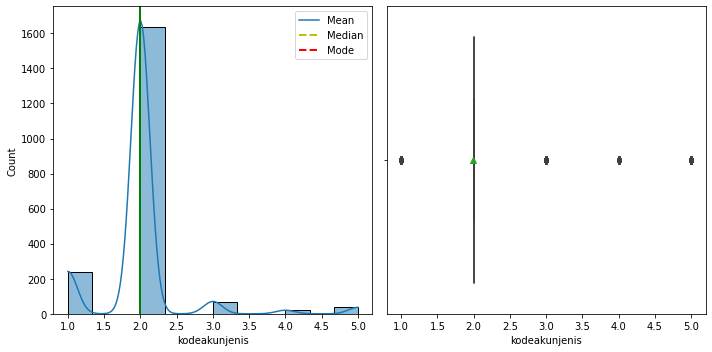

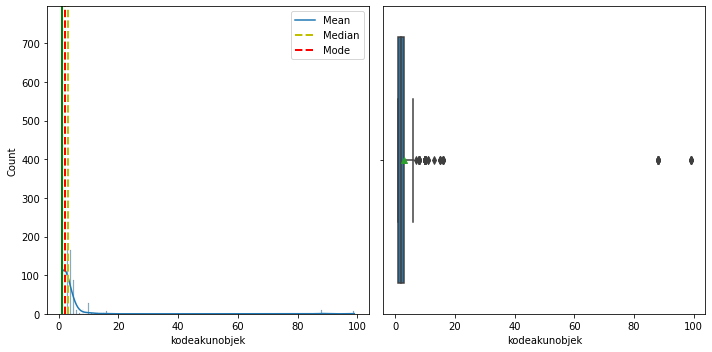

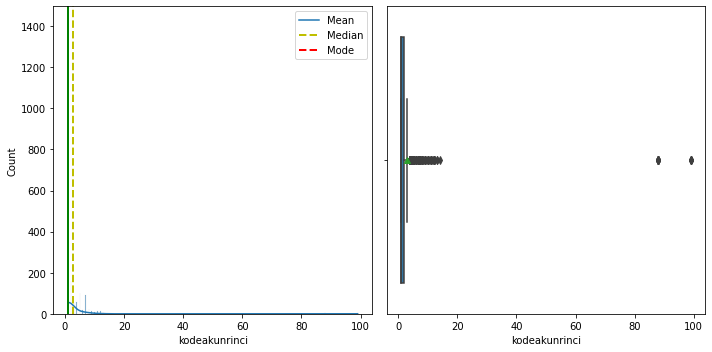

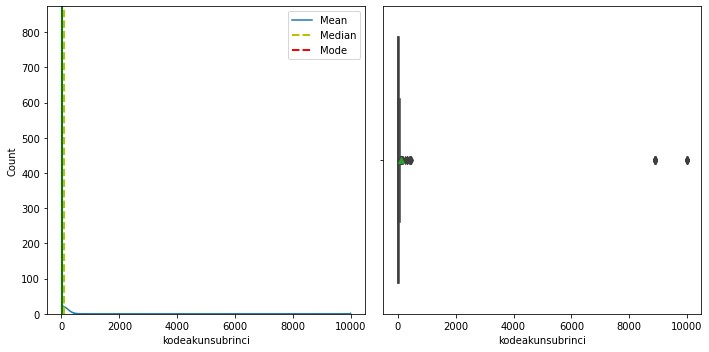

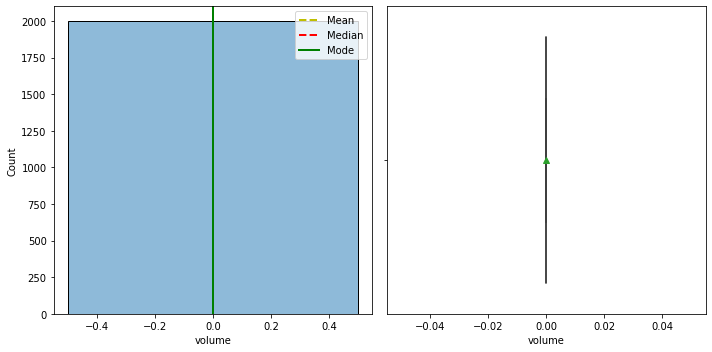

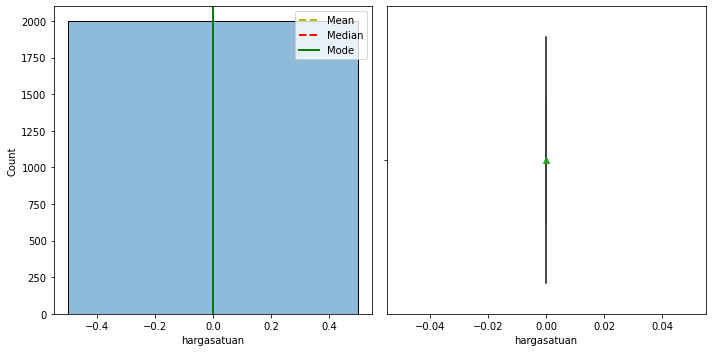

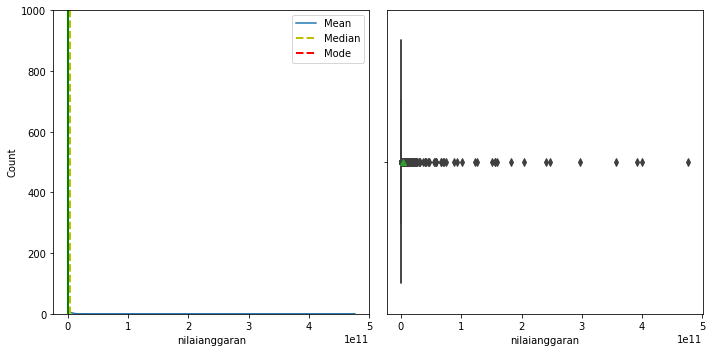

In [24]:
for f in num_cols:
    plot_uni(data2[f])

Bivariate analysis

In [25]:
data2.groupby(by='namapemda')['nilaianggaran'].mean() 

namapemda
Provinsi Aceh    3.251770e+09
Name: nilaianggaran, dtype: float64

In [26]:
print(data[['namapemda','nilaianggaran']].value_counts().sort_index()) 

namapemda      nilaianggaran
Provinsi Aceh  1347             1
               14592            1
               17432            1
               24000            1
               28263            1
                               ..
               297652670000     1
               357289621288     1
               391508000000     1
               399706009000     1
               476370000000     1
Length: 1539, dtype: int64


LINEAR REGRESSION

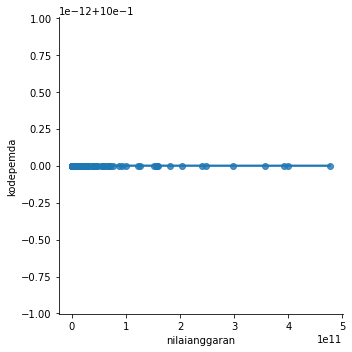

In [57]:
sns.lmplot(x = "nilaianggaran", y = "kodepemda", data = data2)

In [52]:
y, X = dmatrices('kodepemda ~ nilaianggaran', data=data2, return_type='dataframe')
print("X:", type(X))
print(X.columns)
model=sm.OLS(y, X)
result=model.fit()
result.summary()

X: <class 'pandas.core.frame.DataFrame'>
Index(['Intercept', 'nilaianggaran'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kodepemda   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -1998.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               1.00
Time:                        10:13:54   Log-Likelihood:                 70586.
No. Observations:                2000   AIC:                        -1.412e+05
Df Residuals:                    1998   BIC:                        -1.412e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.0000   2.57e-18   3.89e+17      0.000       1.000       1.000
nilaianggaran -7.068e-28   1.06e-28     -6.677      0.000   -9.14e-28   -4.99e-28
==============================================================================
Omnibus:                     3691.771   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3603587.662
Skew:                          13.584   Prob(JB):                         0.00
Kurtosis:                     209.167   Cond. No.                     2.45e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
model = sm.OLS.from_formula('kodepemda ~ nilaianggaran', data = data2)
results = model.fit()
print(results.params)

Intercept        1.000000e+00
nilaianggaran   -7.068194e-28
dtype: float64


CLASSIFICATION

In [29]:
data2['rate_code'] = (data2['nilaianggaran'] > 4).astype(np.float32)

<AxesSubplot:ylabel='Density'>

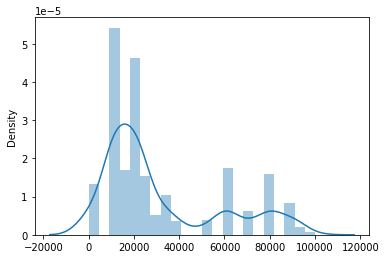

In [30]:
y, X = dmatrices('rate_code ~ kodesubkegiatan', data = data2)
sns.distplot(X[y[:,0] > 0, 1])
sns.distplot(X[y[:,0] == 0, 1])

Classification using Sklearn's Random Forest Classifier

In [31]:
y, X = dmatrices('rate_code ~ nilaianggaran', data = data2)
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      2000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



KNN Classification

In [32]:
#Mengambil nilai X dan Y.

X = data2[['kodeakunrinci', 'nilaianggaran']].to_numpy()
y = data2['namaakunrinci']

In [33]:
#Data discaled agar ukuran data dan rentang data tidak terlalu besar.

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X)
X_scaled

,0,1
0,1,31600000
1,1,50000000
2,6,57250000
3,1,50000000
4,1,600669000
...,...,...
1995,4,1087300000
1996,5,53160000
1997,9,642125000
1998,1,18891200


In [34]:
#Data string diberi label untuk diubah ke data numeric.

label = list(y.unique())
label

['Retribusi Pemakaian Kekayaan Daerah                                                                                                                                                                     ',
 'Retribusi Tempat Penginapan/ Pesanggrahan/Vila                                                                                                                                                          ',
 'Pendapatan Denda atas Keterlambatan Pelaksanaan Pekerjaan                                                                                                                                               ',
 'Pendapatan dari Pengembalian Kelebihan Pembayaran Pajak Penghasilan Pasal 21                                                                                                                            ',
 'Pendapatan BLUD                                                                                                                                                                   

In [35]:
#Membagi data menjadi data training dan test.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3)

In [36]:
#Membuat model KNN dengan nilai k = 10.

knn_model = KNeighborsClassifier(n_neighbors = 10)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [37]:
#Nilai akurasi.

knn_model.score(X_train, y_train)

0.39714285714285713

In [38]:
#Nilai akurasi ditiap nilai k dari k-1 hingga k-49.

knn_scores = []
for k in range(1, 50):
    knn_model.n_neighbors = k
    score = cross_val_score(knn_model, X_train, y_train, cv=3, scoring='accuracy')
    score_mean = score.mean()
    knn_scores.append(score_mean)

print(knn_scores)

[0.26212882888678535, 0.3042952152509091, 0.3092855195399975, 0.30572889383119967, 0.30072020904749214, 0.31072992007548256, 0.31358655528086926, 0.3128651208670692, 0.31286971599072394, 0.31429573603158995, 0.3235794175221255, 0.32501003268664624, 0.33287228925997064, 0.33001565405458394, 0.3335799383028064, 0.33001259063881405, 0.3271513603097726, 0.3378656569648289, 0.3435850542071421, 0.33786718867271387, 0.3392870818820401, 0.3421421853795419, 0.34428504471055316, 0.3435697371282928, 0.34642943574944934, 0.3407238238781005, 0.34214371708742686, 0.3450095425401231, 0.3478646460376249, 0.3450080108322382, 0.34501260595589295, 0.3435819907913722, 0.34286668320911184, 0.3421529073347364, 0.3407238238781006, 0.3421529073347364, 0.3428620880854571, 0.3385824962549742, 0.33786412525694404, 0.3378656569648289, 0.3321569816777103, 0.33215085484617063, 0.3385733060076646, 0.33572126592593277, 0.3414345363367062, 0.3442927032499778, 0.34143759975247595, 0.34001311141949503, 0.344289639834207

In [39]:
#Tes akurasi KNN dengan cross validation.

knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn_model, X_train, y_train, cv=3, scoring='accuracy')

print(scores)
print(scores.mean())

[0.35546039 0.32762313 0.34978541]
0.34428963983420796


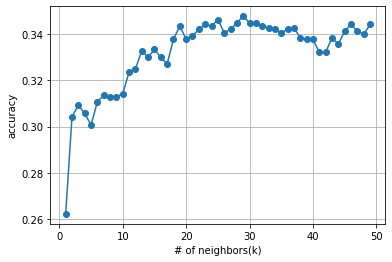

In [40]:
#k terbaik

plt.plot(range(1, 50), knn_scores, 'o-')
plt.xlabel('# of neighbors(k)')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [41]:
#Nilai akurasi dari nilai k yang dipilih.
#terlalu ke kiri = overfitting, terlalu ke kanan = akurasi kurang bagus

knn_model = KNeighborsClassifier(n_neighbors = 30)
knn_model.fit(X_train, y_train)
knn_model.score(X_test, y_test)

0.33166666666666667

                                                                                                                                                                                                                                                                  precision    recall  f1-score   support

                                                        BBNKB-Kendaraan Khusus Alat Berat                                                                                                                                                                              0.00      0.00      0.00         1
                                                        BBNKB-Mobil Barang/Beban-Truck                                                                                                                                                                                 0.00      0.00      0.00         1
                                                        Belanja Barang Pakai Habis                       

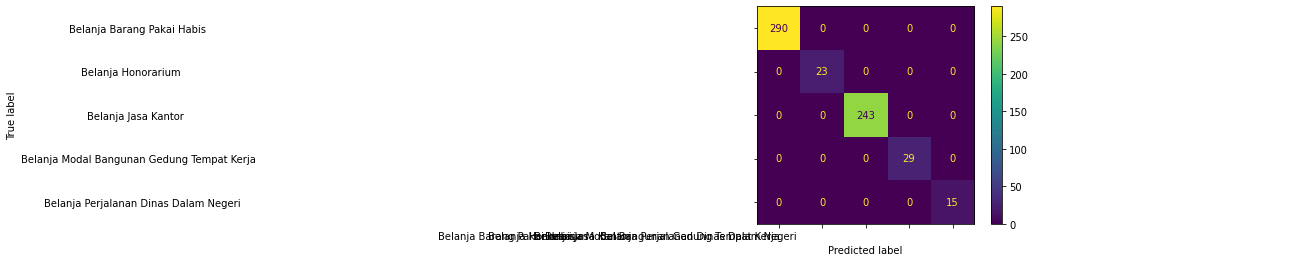

In [42]:
#Menampilkan matrix hasil klasifikasi dan confusion matrix

y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(knn_model, X_test, y_pred)

plt.show()

In [45]:
knn_data = data2[['namapemda', 'kodeakunrinci', 'namaakunrinci', 'nilaianggaran']].copy()

knn_data

,namapemda,kodeakunrinci,namaakunrinci,nilaianggaran
kodefungsi,,,,
1970-01-01 00:00:00.000000010,Provinsi Aceh,1,Retribusi Pemakaian Kekayaan Daerah ...,31600000
1970-01-01 00:00:00.000000010,Provinsi Aceh,1,Retribusi Pemakaian Kekayaan Daerah ...,50000000
1970-01-01 00:00:00.000000010,Provinsi Aceh,6,Retribusi Tempat Penginapan/ Pesanggrahan/Vila...,57250000
1970-01-01 00:00:00.000000010,Provinsi Aceh,1,Pendapatan Denda atas Keterlambatan Pelaksanaa...,50000000
1970-01-01 00:00:00.000000010,Provinsi Aceh,1,Pendapatan dari Pengembalian Kelebihan Pembaya...,600669000
...,...,...,...,...
1970-01-01 00:00:00.000000007,Provinsi Aceh,4,Belanja Modal Alat Laboratorium Fisika Nuklir/...,1087300000
1970-01-01 00:00:00.000000007,Provinsi Aceh,5,Belanja Modal Alat Proteksi Radiasi/Proteksi L...,53160000
1970-01-01 00:00:00.000000007,Provinsi Aceh,9,Belanja Modal Alat Laboratorium Standarisasi K...,642125000
